In [91]:
"""
Universidade Federal de Pernambuco – CIn
Pós-graduação em Ciência da Computação
Disciplina: Aprendizagem de Máquina 
Professor: Leandro Maciel Almeida
Estudantes: Carlos Antônio Alves Junior,
            Matheus Johann Araújo e
            Marcos de Souza Oliveira.           
Atividade: Missão 05 - SVM
Data: 20/07/2021

--------------
Referências:
    https://scikit-learn.org/stable/modules/svm.html
    https://scikit-learn.org/stable/modules/multiclass.html
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
    https://archive.ics.uci.edu/ml/datasets/glass+identification
    https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
    https://www.youtube.com/watch?v=Zj1CoJk2feE
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

In [92]:
# Reading database
dt = pd.read_csv('./glass.data')
dt.columns = ['ID', 'RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE', 'class']

In [93]:
# Removing ID column
dt = dt.drop('ID', 1)

In [94]:
# Displaying existing columns
print(dt.columns)

Index(['RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE', 'class'], dtype='object')


count    214.000000
mean       2.780374
std        2.103739
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: class, dtype: float64


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


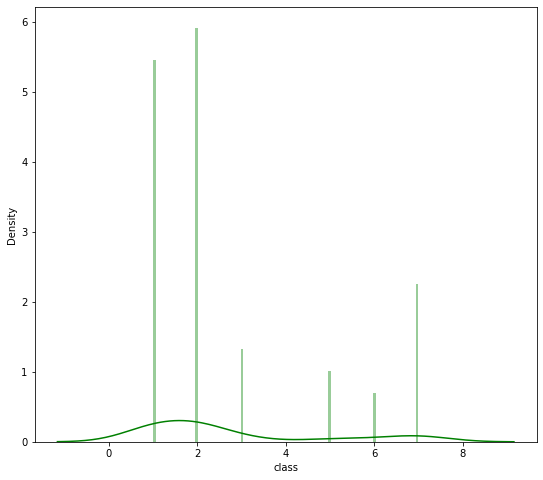

In [95]:
print(dt['class'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dt['class'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()

In [96]:
dt['class'] = dt['class'] - 1
dt['class'] = dt['class'].mask(dt['class'] > 3, dt['class'] - 1)

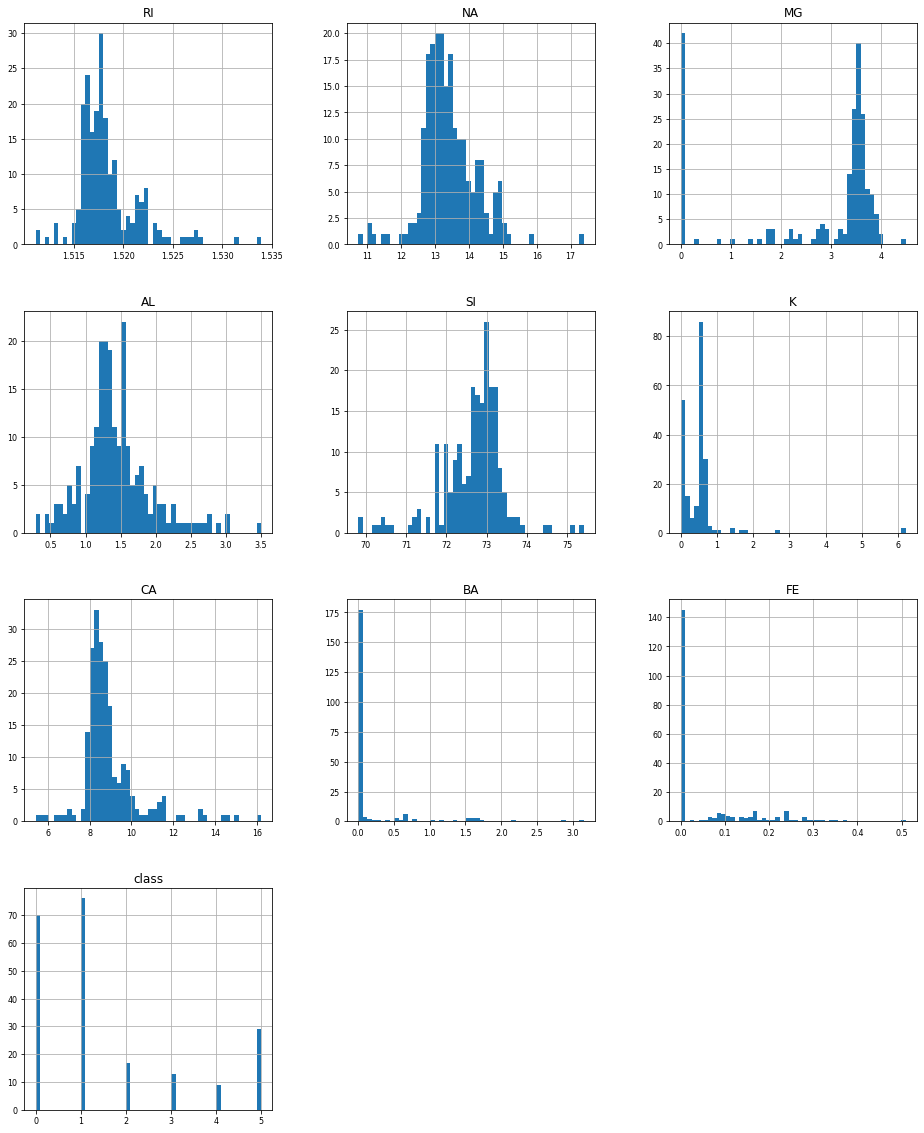

In [97]:
dt.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [98]:
df_num_corr = dt.corr()['class'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Class:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with Class:
AL    0.591198
BA    0.577676
NA    0.506424
MG   -0.728160
Name: class, dtype: float64


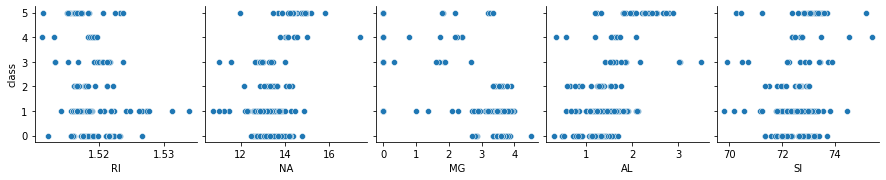

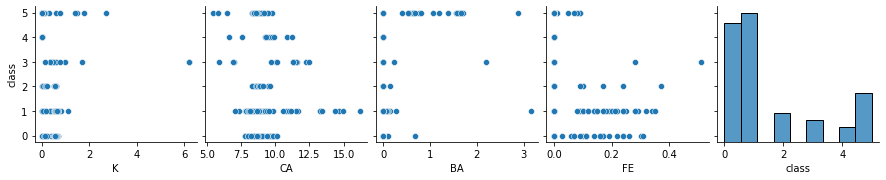

In [99]:
for i in range(0, len(dt.columns), 5):
    sns.pairplot(data=dt,
                x_vars=dt.columns[i:i+5],
                y_vars=['class'])
    plt.show()

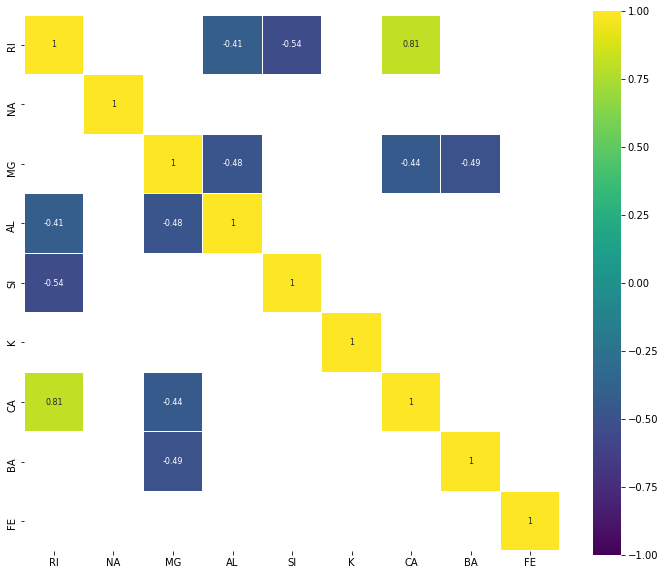

In [100]:
corr = dt.drop('class', axis=1).corr() # We already examined class correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

In [101]:
dt.describe(percentiles=[0.5])

,RI,NA,MG,AL,SI,K,CA,BA,FE,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1.542056
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,1.707648
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,5.000000


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


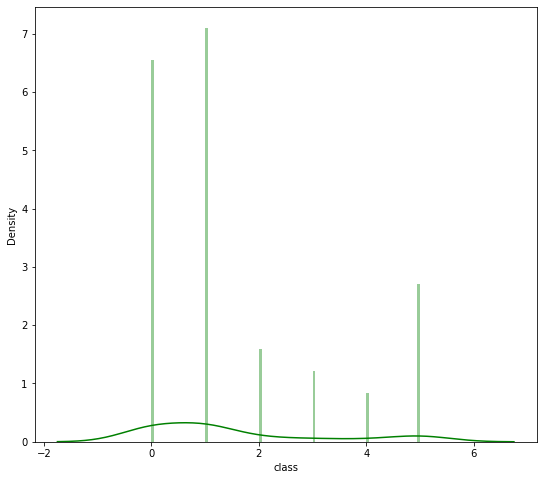

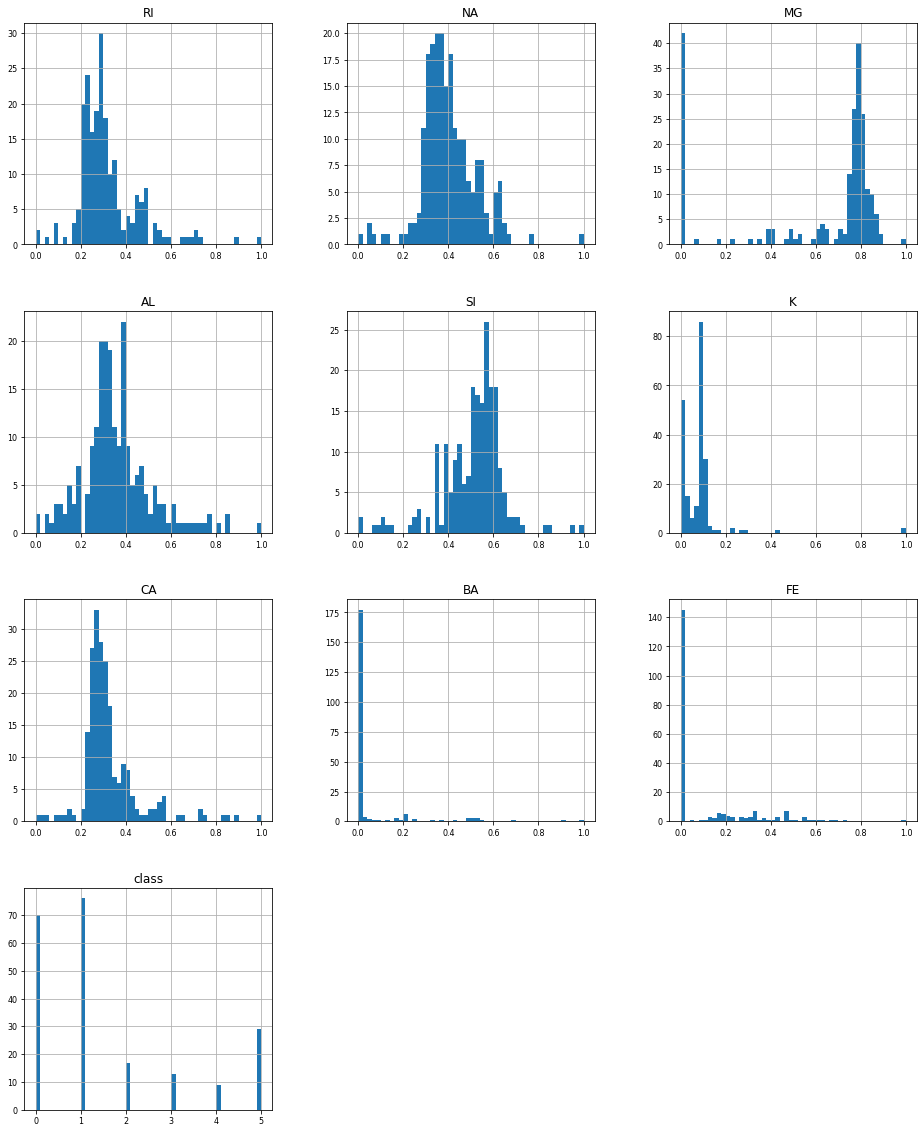

In [102]:
norm_min_max = lambda x: (x - np.min(x))/(np.max(x) - np.min(x))
dt = dt.copy()
dt.iloc[:,0:9] = dt.iloc[:,0:9].apply(norm_min_max, axis=0)
dt.describe(percentiles=[0.5])
plt.figure(figsize=(9, 8))
sns.distplot(dt['class'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()
dt.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (poly): 0.3953488372093023
Grid Best Params: {'C': 1000, 'gamma': 1, 'kernel': 'poly'}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (rbf): 0.5116279069767442
Grid Best Params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (sigmoid): 0.4418604651162791
Grid Best Params: {'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (linear): 0.4883720930232558
Grid Best Params: {'C': 100, 'gamma': 1, 'kernel': 'linear'}



c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: 

----------------------------------------------------------------------------------------------------
Acurácia do conjunto de treinamento: 
----------------------------------------------------------------------------------------------------
Média de acurácia para kernel POLY
Treino:  0.9481478652066886
Validação:  0.720392156862745

Média de acurácia para kernel POLY (sem atributos correlacionados)
Treino:  0.7966148883795942
Validação:  0.6233986928104575

Média de acurácia para kernel RBF
Treino:  0.8831686614039553
Validação:  0.6983006535947712

Média de acurácia para kernel RBF (sem atributos correlacionados)
Treino:  0.7733587980646806
Validação:  0.6256209150326797

Média de acurácia para kernel SIGMOID
Treino:  0.7372302860538152
Validação:  0.6419607843137256

Média de acurácia para kernel SIGMOID (sem atributos correlacionados)
Treino:  0.6010440539852304
Validação:  0.5591503267973857

Média de acurácia para kernel LINEAR
Treino:  0.7467184449537392
Validação:  0.651307189542

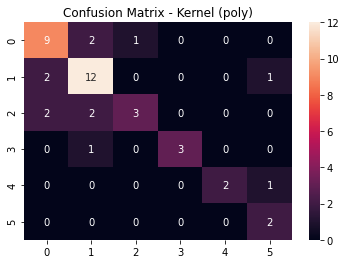

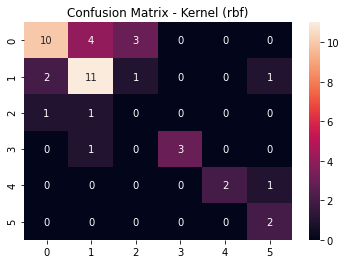

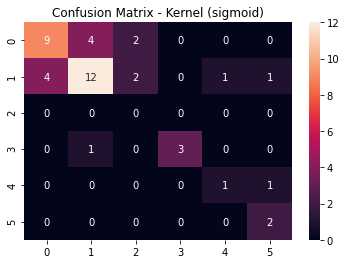

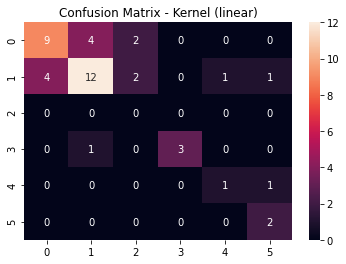

In [103]:
# A function which returns the corresponding SVC model
# Kernels: poly = 0, rbf = 1, sigmoid = 2, linear = 3
def getClassifier(ktype):
  # Polynomial kernal
  if ktype == 0 or ktype == 'poly':  
    return svm.SVC(kernel='poly', degree=8, gamma="auto")
  # Radial Basis Function kernal
  elif ktype == 1 or ktype == 'rbf':  
    return svm.SVC(kernel='rbf', gamma="auto")
  # Sigmoid kernal
  elif ktype == 2 or ktype == 'sigmoid':  
    return svm.SVC(kernel='sigmoid', gamma="auto")
  # Linear kernal
  elif ktype == 3 or ktype == 'linear':  
    return svm.SVC(kernel='linear', gamma="auto")

# SVM get Accuracy Score and Best Params
def getAccuracyScoreAndBestParams(x, y, kernel, svclassifier = None, test_size=0.2, random_state=40, verbose=1):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    # Set svclassifier
    if svclassifier == None:
        svclassifier = getClassifier(kernel)
    # Make prediction
    svclassifier.fit(X_train, y_train)
    # Evaluate our model
    y_pred = svclassifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': [kernel]
    }
    grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=verbose)
    grid.fit(X_train, y_train)
    #be = grid.best_estimator_
    bp = grid.best_params_
    grid_predictions = grid.predict(X_test)
    print(f'Accuracy Score ({kernel}): {acc}')
    #print(f'Grid Best Estimator: {be}')
    print(f'Grid Best Params: {bp}')
    if verbose == 2:
        print(f'Confusion Matrix:\r\n{confusion_matrix(y_test, grid_predictions)}')
        print(f'Classification Report:\r\n{classification_report(y_test, grid_predictions)}')
    print()
    return {'acc': acc, 'bp': bp}

# Role that trains the model
def smv_model_run_kernel(kernel, x_train, y_train, C=1.0, gamma='scale'):
    # Definindo o modo de funcionamento do modelo
    model = svm.SVC(
        kernel=kernel, # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
        C=C, # Termo de regularização
        gamma=gamma        
    )
    # Inserindo os dados de treinamento no modelo
    model.fit(x_train, y_train)
    return model

# Remove empty data
dt = dt.dropna()

# Y contains only classes (target)
y = dt['class']

# X contains only attributes
X = dt.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Removing columns
x_test_cor = X_test.drop(columns=['AL','BA', 'NA', 'MG'])

# Selecting the best hyperparameters
sel_poly = getAccuracyScoreAndBestParams(X, y, 'poly')['bp']
sel_rbf = getAccuracyScoreAndBestParams(X, y, 'rbf')['bp']
sel_sigmoid = getAccuracyScoreAndBestParams(X, y, 'sigmoid')['bp']
sel_linear = getAccuracyScoreAndBestParams(X, y, 'linear')['bp']

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

scores_train = [[], [], [], []]
scores_val = [[], [], [], []]

scores_train_cor = [[], [], [], []]
scores_val_cor = [[], [], [], []]

for train_index, test_index in rskf.split(X_train, y_train):
    X_train_k, X_test_k = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_k, y_test_k = y_train.iloc[train_index], y_train.iloc[test_index]

    x_train_k_cor, x_test_k_cor = X_train_k.drop(columns=['AL','BA', 'NA', 'MG']), X_test_k.drop(columns=['AL','BA', 'NA', 'MG'])

    # Model training with hyperparameter adjustment - Using (X_train_k, y_train_k)
    model_poly = smv_model_run_kernel('poly', X_train_k, y_train_k, C=sel_poly['C'], gamma=sel_poly['gamma'])
    model_rbf = smv_model_run_kernel('rbf', X_train_k, y_train_k, C=sel_rbf['C'], gamma=sel_rbf['gamma'])
    model_sigmoid = smv_model_run_kernel('sigmoid', X_train_k, y_train_k, C=sel_sigmoid['C'], gamma=sel_sigmoid['gamma'])
    model_linear = smv_model_run_kernel('linear', X_train_k, y_train_k, C=sel_linear['C'], gamma=sel_linear['gamma'])
    
    # Model training with hyperparameter adjustment - Using (x_train_k_cor, y_train_k)
    model_poly_cor = smv_model_run_kernel('poly', x_train_k_cor, y_train_k, C=sel_poly['C'], gamma=sel_poly['gamma'])
    model_rbf_cor = smv_model_run_kernel('rbf', x_train_k_cor, y_train_k, C=sel_rbf['C'], gamma=sel_rbf['gamma'])
    model_sigmoid_cor = smv_model_run_kernel('sigmoid', x_train_k_cor, y_train_k, C=sel_sigmoid['C'], gamma=sel_sigmoid['gamma'])
    model_linear_cor = smv_model_run_kernel('linear', x_train_k_cor, y_train_k, C=sel_linear['C'], gamma=sel_linear['gamma'])
        
    # Assessing accuracy and storing each model's score
    scores_train[0].append(model_poly.score(X_train_k, y_train_k)) 
    scores_train[1].append(model_rbf.score(X_train_k, y_train_k))
    scores_train[2].append(model_sigmoid.score(X_train_k, y_train_k))
    scores_train[3].append(model_linear.score(X_train_k, y_train_k))

    scores_train_cor[0].append(model_poly_cor.score(x_train_k_cor, y_train_k)) 
    scores_train_cor[1].append(model_rbf_cor.score(x_train_k_cor, y_train_k))
    scores_train_cor[2].append(model_sigmoid_cor.score(x_train_k_cor, y_train_k))
    scores_train_cor[3].append(model_linear_cor.score(x_train_k_cor, y_train_k))

    scores_val[0].append(model_poly.score(X_test_k, y_test_k))
    scores_val[1].append(model_rbf.score(X_test_k, y_test_k))
    scores_val[2].append(model_sigmoid.score(X_test_k, y_test_k))
    scores_val[3].append(model_linear.score(X_test_k, y_test_k))

    scores_val_cor[0].append(model_poly_cor.score(x_test_k_cor, y_test_k))
    scores_val_cor[1].append(model_rbf_cor.score(x_test_k_cor, y_test_k))
    scores_val_cor[2].append(model_sigmoid_cor.score(x_test_k_cor, y_test_k))
    scores_val_cor[3].append(model_linear_cor.score(x_test_k_cor, y_test_k))
      
kernels = ["poly", "rbf", "sigmoid", "linear"]
models = [model_poly, model_rbf, model_sigmoid, model_linear]

def print_mean_acc(kernel, scores_train, scores_val, scores_train_cor, scores_val_cor):
    kernel = kernel.upper()
    print("Média de acurácia para kernel", kernel)
    print("Treino: ", np.mean(scores_train))
    print("Validação: ", np.mean(scores_val))
    print()
    print("Média de acurácia para kernel", kernel, "(sem atributos correlacionados)")
    print("Treino: ", np.mean(scores_train_cor))
    print("Validação: ", np.mean(scores_val_cor))
    print()
    
print("-" * 100)
print("Acurácia do conjunto de treinamento: ")
print("-" * 100)
for i in range(4):
    print_mean_acc(
        kernels[i],
        scores_train[i],
        scores_val[i],
        scores_train_cor[i],
        scores_val_cor[i]    
    )


print("-" * 100)
print("Acurácia do conjunto de testes: ")
print("-" * 100)
print("Kernel POLY")
print("Score:", model_poly.score(X_test, y_test))
print("Score (sem atributos correlacionados):", model_poly_cor.score(x_test_cor, y_test))
print()
print("Kernel RBF")
print("Score:", model_rbf.score(X_test, y_test))
print("Score (sem atributos correlacionados):", model_rbf_cor.score(x_test_cor, y_test))
print()
print("Kernel SIGMOID")
print("Score:", model_sigmoid.score(X_test, y_test))
print("Score (sem atributos correlacionados):", model_sigmoid_cor.score(x_test_cor, y_test))
print()
print("Kernel LINEAR")
print("Score:", model_linear.score(X_test, y_test))
print("Score (sem atributos correlacionados):", model_linear_cor.score(x_test_cor, y_test))
print()

i = 0
for kernel in kernels:
  ax = plt.subplot()
  ax.set_title(f"Confusion Matrix - Kernel ({kernel})")
  predict_results = models[i].predict(X_test)
  cm = confusion_matrix(predict_results, y_test)
  sns.heatmap(cm, annot=True, ax=ax)
  plt.show()
  i += 1


Média de acurácia para kernel POLY
Treino:  0.9481478652066886
Validação:  0.720392156862745

Média de acurácia para kernel POLY (sem atributos correlacionados)
Treino:  0.7966148883795942
Validação:  0.6233986928104575



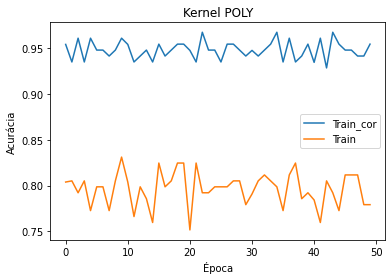

Média de acurácia para kernel RBF
Treino:  0.8831686614039553
Validação:  0.6983006535947712

Média de acurácia para kernel RBF (sem atributos correlacionados)
Treino:  0.7733587980646806
Validação:  0.6256209150326797



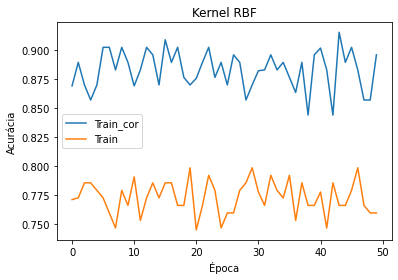

Média de acurácia para kernel SIGMOID
Treino:  0.7372302860538152
Validação:  0.6419607843137256

Média de acurácia para kernel SIGMOID (sem atributos correlacionados)
Treino:  0.6010440539852304
Validação:  0.5591503267973857



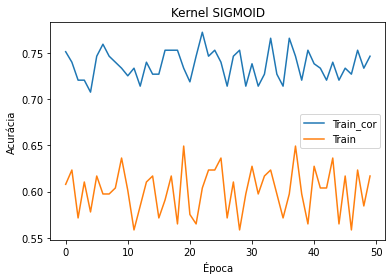

Média de acurácia para kernel LINEAR
Treino:  0.7467184449537392
Validação:  0.6513071895424838

Média de acurácia para kernel LINEAR (sem atributos correlacionados)
Treino:  0.610398947457771
Validação:  0.5696732026143791



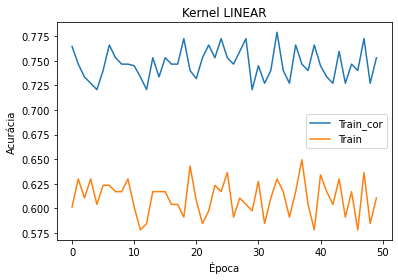

In [104]:
for i in range(4):
    print_mean_acc(
        kernels[i],
        scores_train[i],
        scores_val[i],
        scores_train_cor[i],
        scores_val_cor[i]    
    )
    plt.plot(range(50), scores_train[i], label = "Train_cor")
    plt.plot(range(50), scores_train_cor[i], label = "Train")
    plt.xlabel('Época')
    # Set the y axis label of the current axis.
    plt.ylabel('Acurácia')
    # Set a title of the current axes.
    plt.title("Kernel " + kernels[i].upper())
    plt.legend()
    # Display a figure.
    plt.show()


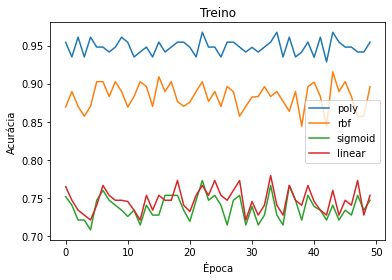

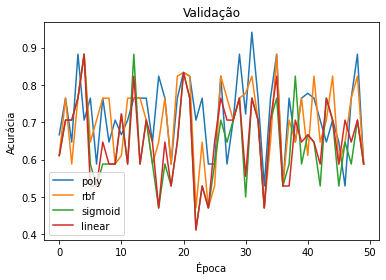

END OF CODE


In [105]:
plt.plot(range(50), scores_train[0], label = "poly")
plt.plot(range(50), scores_train[1], label = "rbf")
plt.plot(range(50), scores_train[2], label = "sigmoid")
plt.plot(range(50), scores_train[3], label = "linear")

plt.xlabel('Época')
# Set the y axis label of the current axis.
plt.ylabel('Acurácia')
# Set a title of the current axes.
plt.title("Treino")
plt.legend()
# Display a figure.
plt.show()

plt.plot(range(50), scores_val[0], label = "poly")
plt.plot(range(50), scores_val[1], label = "rbf")
plt.plot(range(50), scores_val[2], label = "sigmoid")
plt.plot(range(50), scores_val[3], label = "linear")

plt.xlabel('Época')
# Set the y axis label of the current axis.
plt.ylabel('Acurácia')
# Set a title of the current axes.
plt.title("Validação")
plt.legend()
# Display a figure.
plt.show()

print("END OF CODE")